1. Import Dependencies

In [1]:
# importing dependenices for the learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.api import OLS
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import r2_score

2. Collection and Processsing of Data

In [2]:
# loading data into pandas dataframe
nitc = pd.read_csv('/Users/bobchryz/Desktop/BDAAIML Project/cardekho dataset.csv')

In [3]:
# inspecting first five rows of the dataset
nitc.head()

,Unnamed: 0,Vehicle Name,buying_price,selling_price,make_year,vehicle_age,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage
0,0,Hyundai Grand i10 Asta,711000,550000,2016,4,Individual,20000,First Owner,Petrol,Manual,18.90
1,1,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,1014000,570000,2015,5,Dealer,30000,First Owner,Diesel,Manual,22.77
2,2,Maruti Wagon R VXI BS IV,516000,350000,2013,7,Individual,35000,First Owner,Petrol,Manual,18.90
3,3,Hyundai i10 Sportz 1.2,654000,315000,2013,7,Dealer,40000,First Owner,Petrol,Manual,20.36
4,4,Maruti Wagon R VXI,526000,409999,2018,2,Dealer,17512,First Owner,Petrol,Manual,20.51


In [4]:
# checking total number of data points
nitc.shape

(9544, 12)

In [5]:
# Details about the dataset
nitc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9544 non-null   int64  
 1   Vehicle Name       9544 non-null   object 
 2   buying_price       9544 non-null   int64  
 3   selling_price      9544 non-null   int64  
 4   make_year          9544 non-null   int64  
 5   vehicle_age        9544 non-null   int64  
 6   seller_type        9544 non-null   object 
 7   km_driven          9544 non-null   int64  
 8   owner_type         9544 non-null   object 
 9   fuel_type          9544 non-null   object 
 10  transmission_type  9544 non-null   object 
 11  mileage            9544 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 894.9+ KB


In [6]:
# checking for any missing values
nitc.isnull().sum()

Unnamed: 0           0
Vehicle Name         0
buying_price         0
selling_price        0
make_year            0
vehicle_age          0
seller_type          0
km_driven            0
owner_type           0
fuel_type            0
transmission_type    0
mileage              0
dtype: int64

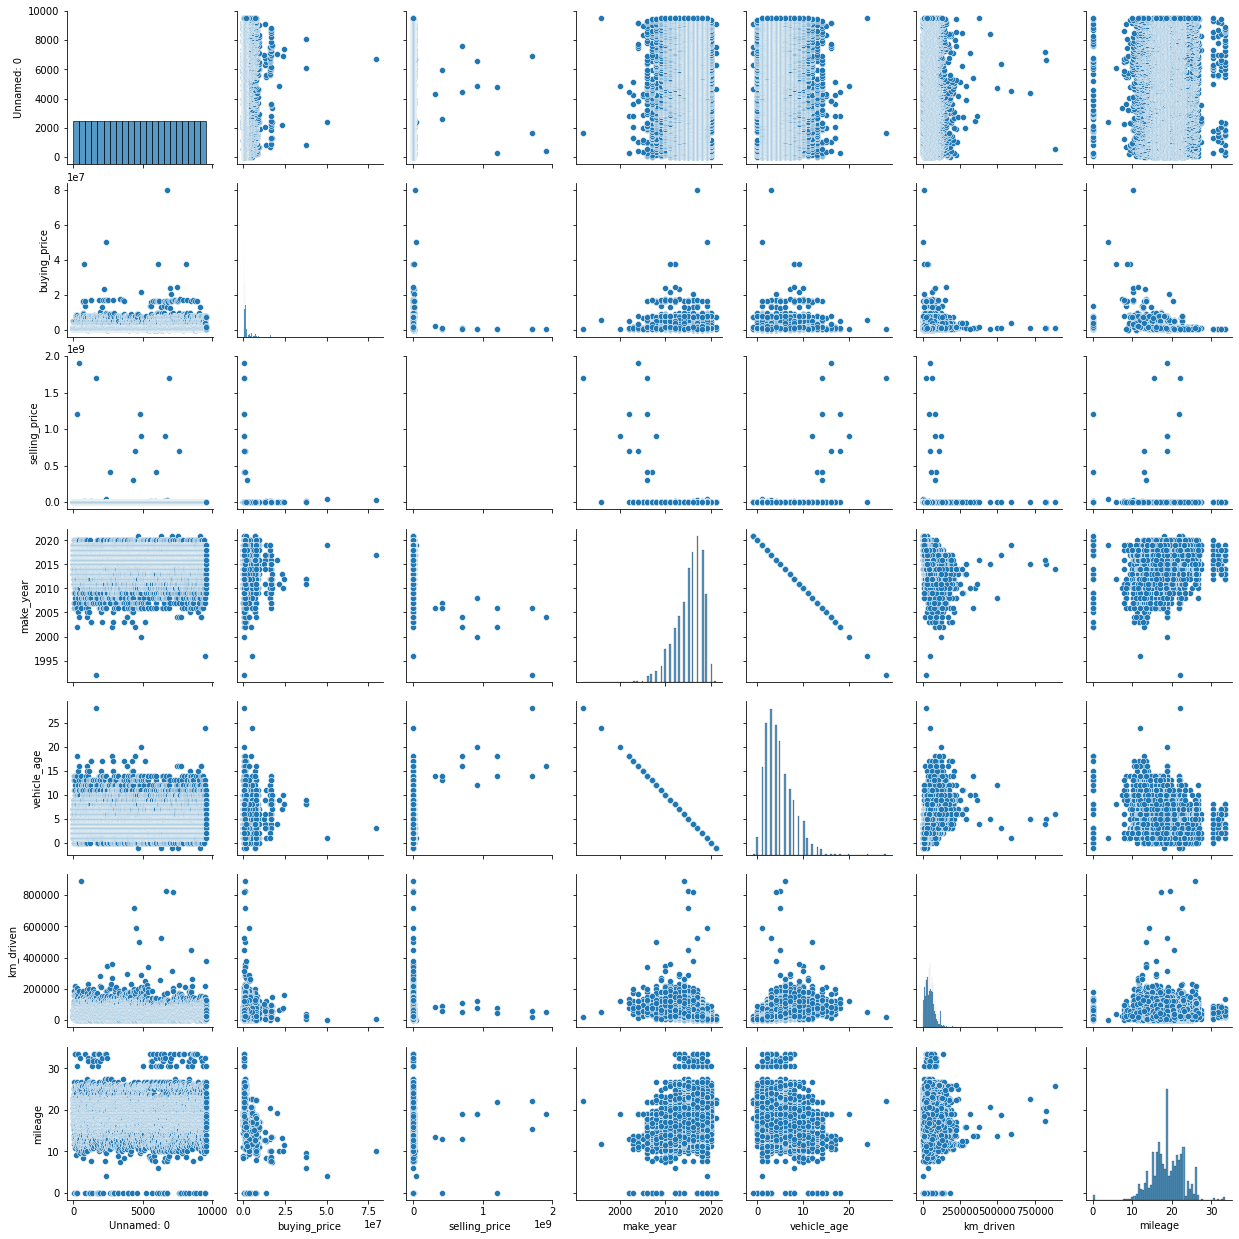

In [7]:
# plotting the dataset
sns.pairplot(nitc)

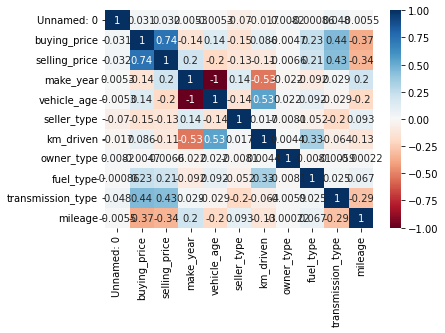

In [52]:
# Creating a heatmap
sns.heatmap(nitc.corr(), annot=True, cmap="RdBu")
plt.show()

In [53]:
# describing the dataset
nitc.describe()

,Unnamed: 0,buying_price,selling_price,make_year,vehicle_age,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage
count,9260.000000,9.260000e+03,9.260000e+03,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000
mean,4779.263283,1.540127e+06,8.487531e+05,2015.514471,4.485529,0.409827,49204.039525,0.000108,0.425810,0.241577,18.983186
std,2754.236189,2.275251e+06,1.028065e+06,2.640318,2.640318,0.522907,32505.572357,0.010392,0.545384,0.428062,4.004072
min,0.000000,1.010000e+05,1.100000e+05,2009.000000,-1.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,2393.750000,6.597500e+05,4.000000e+05,2014.000000,2.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,16.470000
50%,4794.500000,9.095000e+05,5.800000e+05,2016.000000,4.000000,0.000000,45000.000000,0.000000,0.000000,0.000000,18.900000
75%,7163.250000,1.334000e+06,8.900000e+05,2018.000000,6.000000,1.000000,65979.000000,0.000000,1.000000,0.000000,21.790000
max,9542.000000,7.960000e+07,3.950000e+07,2021.000000,11.000000,2.000000,293000.000000,1.000000,3.000000,1.000000,33.540000


In [54]:
# Dropping out of boundary values

nitc.drop(nitc[(nitc['vehicle_age'] > 20) ].index, inplace = True)
nitc.drop(nitc[nitc['km_driven'] >300000 ].index, inplace = True)

In [56]:
# Removing the outliers using Interquartile Range for all columns

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
      
    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data
      
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

out_columns = nitc[['km_driven','vehicle_age','mileage','selling_price','buying_price','make_year']]  
for i in out_columns:
    removeOutliers(nitc, i)
  
# Assigning filtered data back to our original variable'

nitc = filtered_data
print("Shape of data after outlier removal is: ", nitc.shape)

IQR value for column km_driven is: 40979.0
IQR value for column vehicle_age is: 4.0
IQR value for column mileage is: 5.32
IQR value for column selling_price is: 490000.0
IQR value for column buying_price is: 674250.0
IQR value for column make_year is: 4.0
Shape of data after outlier removal is:  (9260, 12)


In [57]:
nitc.describe()

,Unnamed: 0,buying_price,selling_price,make_year,vehicle_age,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage
count,9260.000000,9.260000e+03,9.260000e+03,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000,9260.000000
mean,4779.263283,1.540127e+06,8.487531e+05,2015.514471,4.485529,0.409827,49204.039525,0.000108,0.425810,0.241577,18.983186
std,2754.236189,2.275251e+06,1.028065e+06,2.640318,2.640318,0.522907,32505.572357,0.010392,0.545384,0.428062,4.004072
min,0.000000,1.010000e+05,1.100000e+05,2009.000000,-1.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,2393.750000,6.597500e+05,4.000000e+05,2014.000000,2.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,16.470000
50%,4794.500000,9.095000e+05,5.800000e+05,2016.000000,4.000000,0.000000,45000.000000,0.000000,0.000000,0.000000,18.900000
75%,7163.250000,1.334000e+06,8.900000e+05,2018.000000,6.000000,1.000000,65979.000000,0.000000,1.000000,0.000000,21.790000
max,9542.000000,7.960000e+07,3.950000e+07,2021.000000,11.000000,2.000000,293000.000000,1.000000,3.000000,1.000000,33.540000


In [58]:
# distribution of categorical data in the dataset
print(nitc.fuel_type.value_counts())
print(nitc.seller_type.value_counts())
print(nitc.owner_type.value_counts())
print(nitc.transmission_type.value_counts())

0    5557
1    3468
2     230
3       5
Name: fuel_type, dtype: int64
0    5611
1    3503
2     146
Name: seller_type, dtype: int64
0    9259
1       1
Name: owner_type, dtype: int64
0    7023
1    2237
Name: transmission_type, dtype: int64


In [59]:
# observing unique values
nitc.nunique (axis=0)

Unnamed: 0           9260
Vehicle Name         1619
buying_price         1128
selling_price         892
make_year              13
vehicle_age            13
seller_type             3
km_driven            2313
owner_type              2
fuel_type               4
transmission_type       2
mileage               333
dtype: int64

In [60]:
# encoding the categorical data in the dataset

# encoding fuel type column
nitc.replace({'fuel_type':{'Petrol':0,'Diesel':1,'CNG':2,'Electric':3}},inplace=True)

# encoding seller type column
nitc.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding owner type column
nitc.replace({'owner_type':{'First Owner':0,'Second Owner':1,'Third Owner':2}},inplace=True)

# encoding transmission type column
nitc.replace({'transmission_type':{'Manual':0,'Automatic':1}},inplace=True)

In [61]:
# inspecting the dataset again - the first five rows
nitc.head()

,Unnamed: 0,Vehicle Name,buying_price,selling_price,make_year,vehicle_age,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage
0,0,Hyundai Grand i10 Asta,711000,550000,2016,4,1,20000,0,0,0,18.90
1,1,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,1014000,570000,2015,5,0,30000,0,1,0,22.77
2,2,Maruti Wagon R VXI BS IV,516000,350000,2013,7,1,35000,0,0,0,18.90
3,3,Hyundai i10 Sportz 1.2,654000,315000,2013,7,0,40000,0,0,0,20.36
4,4,Maruti Wagon R VXI,526000,409999,2018,2,0,17512,0,0,0,20.51


3. Splitting of Dataset into Training Data and Testing Data

In [62]:
X = nitc.drop(['Unnamed: 0','Vehicle Name','selling_price'],axis=1)
Y = nitc['selling_price']

In [63]:
print(X)

      buying_price  make_year  vehicle_age  seller_type  km_driven  \
0           711000       2016            4            1      20000   
1          1014000       2015            5            0      30000   
2           516000       2013            7            1      35000   
3           654000       2013            7            0      40000   
4           526000       2018            2            0      17512   
...            ...        ...          ...          ...        ...   
9538       2131000       2018            2            1      21265   
9539        498000       2014            6            0      44000   
9540        417000       2017            3            0      29847   
9541        630000       2018            2            1      25000   
9542        907000       2015            5            0      28000   

      owner_type  fuel_type  transmission_type  mileage  
0              0          0                  0    18.90  
1              0          1                

In [18]:
print(Y)

0        550000
1        570000
2        350000
3        315000
4        409999
         ...   
9538    2350000
9539     275000
9540     484999
9541     590000
9542     525000
Name: selling_price, Length: 9260, dtype: int64


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.40, random_state=101)

In [65]:
X_train

,buying_price,make_year,vehicle_age,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage
2371,688000,2017,3,0,23000,0,0,0,21.01
772,1654000,2013,7,0,63000,0,1,0,15.10
770,1268000,2011,9,0,50000,0,0,0,17.00
7635,1055000,2013,7,0,64000,0,0,0,17.01
7059,704000,2017,3,0,32000,0,0,0,17.80
...,...,...,...,...,...,...,...,...,...
618,1510000,2011,9,1,60000,0,1,0,12.05
5881,1007000,2016,4,1,143000,0,1,0,22.77
8248,1545000,2016,4,0,88102,0,1,0,26.00
1410,540000,2015,5,0,33766,0,0,0,20.51


In [66]:
Y_train

2371    600000
772     580000
770     300000
7635    525000
7059    509999
         ...  
618     556000
5881    525000
8248    685000
1410    372000
1597    800000
Name: selling_price, Length: 5556, dtype: int64

In [68]:
model= OLS(Y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1309.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:29:14   Log-Likelihood:                -81283.
No. Observations:                5556   AIC:                         1.626e+05
Df Residuals:                    5547   BIC:                         1.626e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
buying_price          0.2728      0.00

4. Training the Machine Learning Models

In [69]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,Y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(Y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(Y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,Y_train ,cv=3)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # MAE
    mae = metrics.mean_absolute_error(Y_test,y_pred_test)
    
    # MSE
    mse = metrics.mean_squared_error(Y_test,y_pred_test)
    
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("MAE :", round(mae,5))
    print("MSE :", round(mse,5))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((Y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('Y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('Y_test vs y_pred_test')
#     ax[1].scatter(x = Y_test, y = y_pred_test)
    sns.regplot(x=Y_test, y=y_pred_test, robust=True, ci=None)
    ax[1].set_xlabel('Y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

i) LinearRegression

R squared Error :  0.6537685356418207


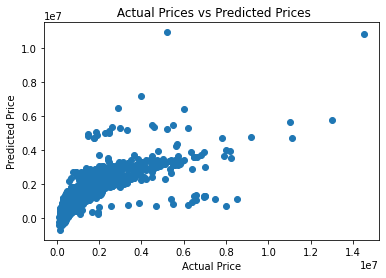

R squared Error : 0.6595213704989565


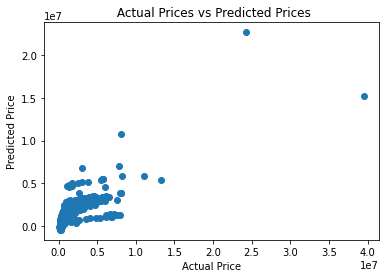

In [70]:
# loading linear regression model
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train,Y_train)

# prediciton on training data
training_data_prediction = lin_reg_model.predict(X_train)

# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


# Visualising Actual and Predicted Prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Y_pred_test = model.predict(X_test)
# MAE
mae = metrics.mean_absolute_error(Y_test,Y_pred_test)
    
# MSE
mse = metrics.mean_squared_error(Y_test,Y_pred_test)

# prediction on testing data
test_data_prediction = lin_reg_model.predict(X_test)

# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :", error_score)

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

ii) Lasso Regression to check if normalised output has some changes

R squared Error :  0.6537685291641577


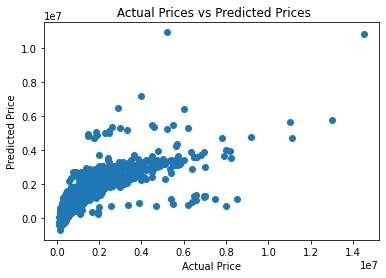

R squared Error : 0.6595216643343375


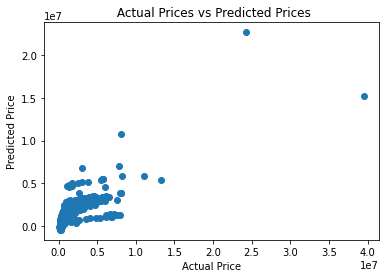

In [71]:
# loading linear regression model
lasso_model = Lasso()

lasso_model.fit(X_train,Y_train)

# prediciton on training data
training_data_prediction = lasso_model.predict(X_train)

# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


# Visualising Actual and Predicted Prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Y_pred_test = model.predict(X_test)
# MAE
mae = metrics.mean_absolute_error(Y_test,Y_pred_test)
    
# MSE
mse = metrics.mean_squared_error(Y_test,Y_pred_test)

# prediction on testing data
test_data_prediction = lasso_model.predict(X_test)

# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :", error_score)

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

iii) Ridge Regression

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.16907e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


R squared Error :  0.6537609017420976


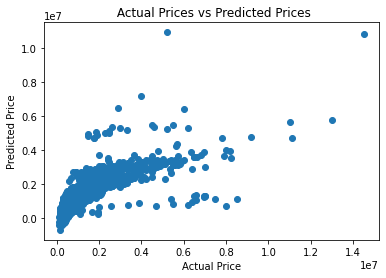

R squared Error : 0.6595335112462991


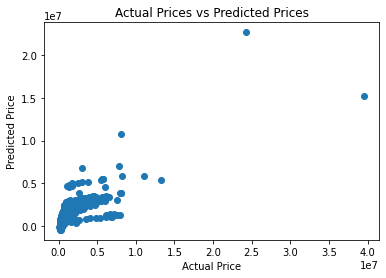

In [72]:
# loading linear regression model
ridge_model = Ridge()

ridge_model.fit(X_train,Y_train)

# prediciton on training data
training_data_prediction = ridge_model.predict(X_train)

# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)


# Visualising Actual and Predicted Prices

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Y_pred_test = model.predict(X_test)
# MAE
mae = metrics.mean_absolute_error(Y_test,Y_pred_test)
    
# MSE
mse = metrics.mean_squared_error(Y_test,Y_pred_test)

# prediction on testing data
test_data_prediction = ridge_model.predict(X_test)

# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :", error_score)

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

Train R2-score : 0.65
Test R2-score : 0.66
Train CV scores : [0.68689836 0.62516958 0.64621143]
Train CV mean : 0.65
MAE : 269676.32271
MSE : 459459958239.08734


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


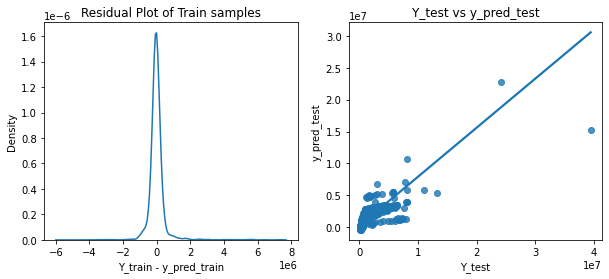

In [73]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.16513e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.32018e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=5.14492e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=4.18501e-19): result may not be accurate.
  retur

Train R2-score : 0.65
Test R2-score : 0.66
Train CV scores : [0.6869594  0.62516957 0.64594377]
Train CV mean : 0.65
MAE : 269322.4348
MSE : 459152026410.004


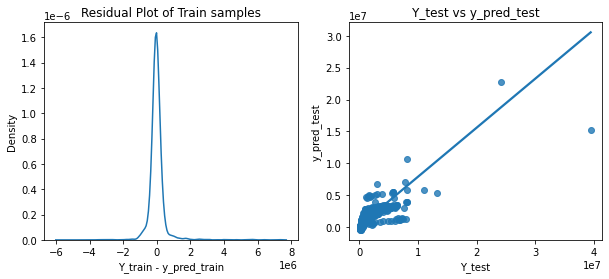

In [74]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

car_pred_model(rg_rs,"ridge.pkl")

Train R2-score : 0.65
Test R2-score : 0.66
Train CV scores : [0.68691822 0.62516958 0.64608925]
Train CV mean : 0.65
MAE : 269548.32912
MSE : 459402915418.7359


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


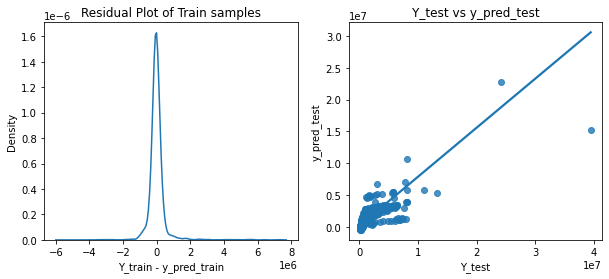

In [75]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

car_pred_model(ls_rs,"lasso.pkl")

In [77]:
from IPython.display import display
Technique = ["LinearRegression","Ridge","Lasso"]
results=pd.DataFrame({'Model': Technique,'R Squared Train': R2_train,'R Squared Test': R2_test,'CV score mean Train': CV})
display(results)

,Model,R Squared Train,R Squared Test,CV score mean Train
0,LinearRegression,0.65,0.66,0.65
1,Ridge,0.65,0.66,0.65
2,Lasso,0.65,0.66,0.65
